In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


This script is focused on brain cell data split into two section. In the first section we plot infividual features along with their posterior correlation distribution. In the next section we investigate the role of coverage and inflation in the discrepance between SCRaPL and Pearson correlations.

In [ ]:
from IPython import display
import pandas as pd
import numpy as np
import scipy
import scipy.stats
from scipy.stats import gaussian_kde

from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib import cm
from matplotlib.colors import Normalize 
from matplotlib.offsetbox import AnchoredText

from tensorflow import keras
from sklearn.neighbors import KernelDensity

from tensorflow.keras import layers
import tensorflow_probability as tfp
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

import pickle
from timeit import default_timer as timer
Folder = '/content/drive/MyDrive/'

Load Data and prepare them for plotting.

In [ ]:
yy_acc_pd = pd.read_csv(Folder+'SCRaPL/Real/Data/Acc_atac.csv',',',header=[0],index_col=[0])
yy_exp_pd = pd.read_csv(Folder+'SCRaPL/Real/Data/Rna_atac.csv',',',header=[0],index_col=[0])
Norm = pd.read_csv(Folder+'SCRaPL/Real/Data/Nrm_atac.csv',',',index_col=[1])
Norm = Norm.drop(columns=Norm.columns[0])

In [ ]:
with open(Folder+'SCRaPL/Real/Results_atac_col/nuts_cor_atac.pickle', 'rb') as handle:
    post_cor = pickle.load(handle)

In [ ]:
yy_acc_nrm = np.log(1+yy_acc_pd.div(Norm['nrm_acc']))
yy_exp_nrm = np.log(1+yy_exp_pd.div(Norm['nrm_rna']))

tt1 = yy_acc_pd.div(Norm['nrm_acc']).to_numpy()
tt2 = yy_exp_pd.div(Norm['nrm_rna']).to_numpy()
corr = np.corrcoef(tt1,tt2)
crr_prs = np.diag(corr[:4249,4249:])

In [ ]:
#Plotting functions
def density_scatter_plot(x, y,m_ln,c_ln, **kwargs):

    x_acc,x_exp = x

    m_acc,m_exp = m_ln
    c_acc,c_exp = c_ln

    values_acc = np.vstack((x_acc, y))
    kernel_acc = gaussian_kde(values_acc)
    kde_acc = kernel_acc.evaluate(values_acc)

    norm_acc = Normalize(vmin=kde_acc.min(), vmax=kde_acc.max())
    colors_acc = cm.ScalarMappable(norm=norm_acc, cmap='viridis').to_rgba(kde_acc)

    values_exp = np.vstack((x_exp, y))
    kernel_exp = gaussian_kde(values_exp)
    kde_exp = kernel_exp.evaluate(values_exp)

    norm_exp = Normalize(vmin=kde_exp.min(), vmax=kde_exp.max())
    colors_exp = cm.ScalarMappable(norm=norm_exp, cmap='viridis').to_rgba(kde_exp)

    kwargs['color'] = colors_acc
    kwargs['color'] = colors_exp

    
    fig, ax = plt.subplots(1,2)
    ax[0].scatter(x_acc,y,c=colors_acc,label='Data')
    ax[0].plot(x_acc, m_acc*x_acc + c_acc, 'r', label="y = {}+{}x".format(np.round_(c_acc,decimals=2),np.round_(m_acc,decimals=2)))
    ax[0].set_xlabel("% zeros acc. (ln)",fontsize=20)
    ax[0].set_ylabel(r"ln(1+|$\bar{ρ_{j}}$-$\bar{ρ_{prs}}$|)",fontsize=20)
    ax[0].legend()
    ax[1].scatter(x_exp,y,c=colors_exp,label='Data')
    ax[1].plot(x_exp, m_exp*x_exp + c_exp, 'r', label="y = {}+{}x".format(np.round_(c_exp,decimals=2),np.round_(m_exp,decimals=2)))
    ax[1].set_xlabel("% zeros exp. (ln)",fontsize=20)
    ax[1].set_ylabel(r"ln(1+|$\bar{ρ_{j}}$-$\bar{ρ_{prs}}$|)",fontsize=20)
    ax[1].legend()

    plt.tight_layout()

def density_scatter_feature(x, y,cr_pst,prs,ft_ind, **kwargs):

    values = np.vstack((x, y))
    kernel = gaussian_kde(values)
    kde = kernel.evaluate(values)

    norm = Normalize(vmin=kde.min(), vmax=kde.max())
    colors = cm.ScalarMappable(norm=norm, cmap='viridis').to_rgba(kde)
    kwargs['color'] = colors

    anchored_text = AnchoredText("Prs. = {}".format(np.round_(prs,decimals=2)), loc=2)
    
    fig, ax = plt.subplots(1,2)
    im = ax[0].scatter(x,y,c=colors)
    fig.colorbar(im, ax=ax[0])
    ax[0].set_xlabel("Log Accessibility", labelpad = 5,fontsize=20)
    ax[0].set_ylabel("Log Expression", labelpad = 5,fontsize=20)
    ax[0].add_artist(anchored_text)
    #plt.rcParams.update({'font.size': 20})

    print( )
    ax[1].violinplot(np.tanh(cr_pst/2),showmeans=True)
    ax[1].set_xlabel("Feature {}".format(ft_ind), labelpad = 5,fontsize=20)
    ax[1].set_ylabel("Posterior Correlation", labelpad = 5,fontsize=20)
    ax[1].set_xticklabels([])
    plt.tight_layout()


Plot individual features

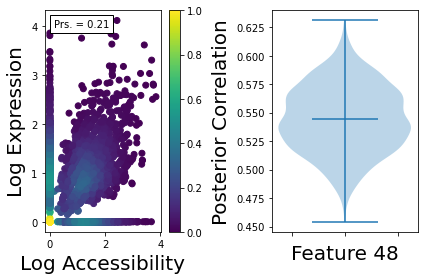

In [ ]:
aaa=  47# 730# 595# 2570#
x = yy_acc_nrm.iloc[aaa,:].to_numpy()
y = yy_exp_nrm.iloc[aaa,:].to_numpy()
cr = post_cor[:,aaa].numpy()

density_scatter_feature(x, y,cr,crr_prs[aaa],aaa+1)
#plt.savefig(Folder+'SCRaPL/Real/Paper_Analysis/Brain_ft_'+str(aaa+1)+'_eifi.pdf')
plt.show()

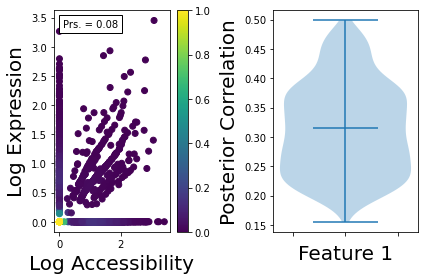

In [ ]:
aaa=4246#1167#370# 104# 0#

x = yy_acc_nrm.iloc[aaa,:].to_numpy()
y = yy_exp_nrm.iloc[aaa,:].to_numpy()
cr = post_cor[:,aaa].numpy()

density_scatter_feature(x, y,cr,crr_prs[aaa],aaa+1)
#plt.savefig(Folder+'SCRaPL/Real/Paper_Analysis/Brain_ft_'+str(aaa+1)+'_eifn.pdf')
plt.show()

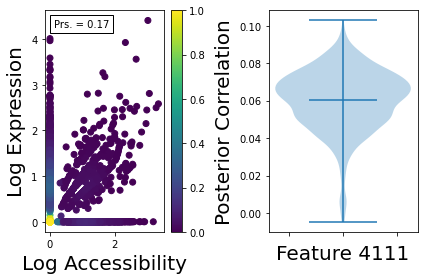

In [ ]:
aaa=  #4111# 475 # 476 # 1441 # 1443 # 3420 # 3424 # 4110 # 

x = yy_acc_nrm.iloc[aaa,:].to_numpy()
y = yy_exp_nrm.iloc[aaa,:].to_numpy()
cr = post_cor[:,aaa].numpy()

density_scatter_feature(x, y,cr,crr_prs[aaa],aaa)
#plt.savefig(Folder+'SCRaPL/Real/Paper_Analysis/Brain_ft_'+str(aaa+1)+'_enfi.pdf')
plt.show()

Investigate the impact of zero inflation in the discrepancy between SCRaPL's posterior mean and Pearson correlation. This is done by regressing average feature accessibility's and expression's observed zeros against the correlation discrepancy.

In [ ]:
zrs_acc = np.mean(yy_acc_nrm.to_numpy()==0,axis=1)
zrs_exp = np.mean(yy_exp_nrm.to_numpy()==0,axis=1)
post_cor_mn = tf.reduce_mean(tf.tanh(post_cor/2),axis=0).numpy()

In [ ]:
y = np.log(1+np.abs(post_cor_mn-crr_prs))
x_acc = np.log(1+zrs_acc)
x_exp = np.log(1+zrs_exp)

xx_acc_min = np.min(x_acc)
xx_acc_max = np.max(x_acc)
xx_acc = np.linspace(xx_acc_min,xx_acc_max,num=100)

xx_exp_min = np.min(x_exp)
xx_exp_max = np.max(x_exp)
xx_exp = np.linspace(xx_exp_min,xx_exp_max,num=100)

In [ ]:
A_acc =  np.hstack([np.ones_like(x_acc[:,np.newaxis]),x_acc[:,np.newaxis]])
A_exp =  np.hstack([np.ones_like(x_exp[:,np.newaxis]),x_exp[:,np.newaxis]])
c_acc,m_acc = np.linalg.lstsq(A_acc, np.transpose(y), rcond=None)[0]
c_exp,m_exp = np.linalg.lstsq(A_exp, np.transpose(y), rcond=None)[0]

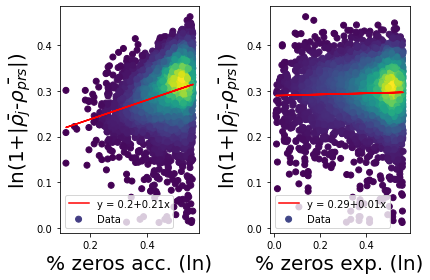

In [ ]:
density_scatter_plot([x_acc,x_exp],y,[m_acc,m_exp],[c_acc,c_exp])
#plt.savefig(Folder+'SCRaPL/Real/Paper_Analysis/scatter_check_brain.pdf')